In [902]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns


#Setting Plot theme
#custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="darkgrid",  palette="pastel")
#sns.set_style("darkgrid")

columns = ['order_id', 'order_date', 'ship_mode', 'region', 'product_id', 'category', 'sub_category', 'prod_name', 'sales', 'quantity', 'discount', 'profit']
df = pd.read_csv("data/office_supplies.csv", names= columns, skiprows=1)

df.head()

,order_id,order_date,ship_mode,region,product_id,category,sub_category,prod_name,sales,quantity,discount,profit
0,CA-2015-110870,2015-12-12,First Class,West,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,299.94,6,0.0,NaN
1,CA-2015-110870,2015-12-12,First Class,West,OFF-SU-10001225,Office Supplies,Supplies,Staple remover,25.76,7,0.0,NaN
2,CA-2014-143210,2014-12-01,First Class,East,TEC-PH-10004434,Technology,Phones,Cisco IP Phone 7961G VoIP phone - Dark gray,271.90,2,0.0,NaN
3,CA-2014-143210,2014-12-01,First Class,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",45.84,3,0.0,NaN
4,CA-2014-143210,2014-12-01,First Class,East,FUR-FU-10002268,Furniture,Furnishings,Ultra Door Push Plate,9.82,2,0.0,NaN


In [903]:
df['ship_mode'].drop_duplicates()

0        First Class
5     Standard Class
9       Second Class
11          Same Day
Name: ship_mode, dtype: object

In [904]:
df.dtypes

order_id         object
order_date       object
ship_mode        object
region           object
product_id       object
category         object
sub_category     object
prod_name        object
sales           float64
quantity          int64
discount        float64
profit          float64
dtype: object

In [905]:
# Transform date from string to date
df['order_date'] = pd.to_datetime(df['order_date'], format='%Y-%m-%d')

df['month'] = pd.DatetimeIndex(df['order_date']).month


In [906]:
df.isna().sum()

order_id           0
order_date         0
ship_mode          0
region             0
product_id         0
category           0
sub_category       0
prod_name          0
sales              0
quantity           0
discount           0
profit          1993
month              0
dtype: int64

In [907]:
# Preenchendo Valores ausentes com zero
df = df.fillna(0)

Verificando a lista de produtos disponiveis nos estoques

In [908]:
# Lista de produtos total
prod_list = df[['product_id', 'prod_name', 'category', 'sub_category']].drop_duplicates(subset = 'product_id', keep = 'first')

# Produtos vendidos em cada região
prod_west = df[df.region == 'West'][['product_id']].drop_duplicates()
prod_east = df[df.region == 'East'][['product_id']].drop_duplicates()
prod_central = df[df.region == 'Central'][['product_id']].drop_duplicates()
prod_south = df[df.region == 'South'][['product_id']].drop_duplicates()


prod_west = pd.merge(prod_list, prod_west, how = 'inner', on='product_id')
prod_east = pd.merge(prod_list, prod_east, how = 'inner', on='product_id')
prod_central = pd.merge(prod_list, prod_central, how = 'inner', on='product_id')
prod_south = pd.merge(prod_list, prod_south, how = 'inner', on='product_id')

# Produtos não vendidos em cada região
prod_not_west = pd.concat([prod_list,prod_west]).drop_duplicates(keep=False)
prod_not_west['region'] = 'West'

prod_not_east = pd.concat([prod_list,prod_east]).drop_duplicates(keep=False)
prod_not_east['region'] = 'East'

prod_not_central = pd.concat([prod_list,prod_central]).drop_duplicates(keep=False)
prod_not_central['region'] = 'Central'

prod_not_south = pd.concat([prod_list,prod_south]).drop_duplicates(keep=False)
prod_not_south['region'] = 'South'



prod_not_regions = pd.concat([prod_not_west, prod_not_east, prod_not_central, prod_not_south])

In [909]:
print('The is %d different products' % (len(prod_list)))


The is 1862 different products


In [910]:
notsold = prod_not_south.merge(prod_not_west, on=['product_id', 'prod_name', 'category', 'sub_category'], how='inner')\
            .merge(prod_not_central, on=['product_id', 'prod_name', 'category', 'sub_category'], how='inner')
            #.merge(prod_not_central, on=['product_id', 'prod_name', 'category', 'sub_category'], how='inner')
notsold = notsold[['product_id', 'prod_name', 'category', 'sub_category']]


len(notsold)


53

In [911]:
#df_popularity_central.merge(notsold, how='inner', on=['product_id', 'prod_name', 'category', 'sub_category'])

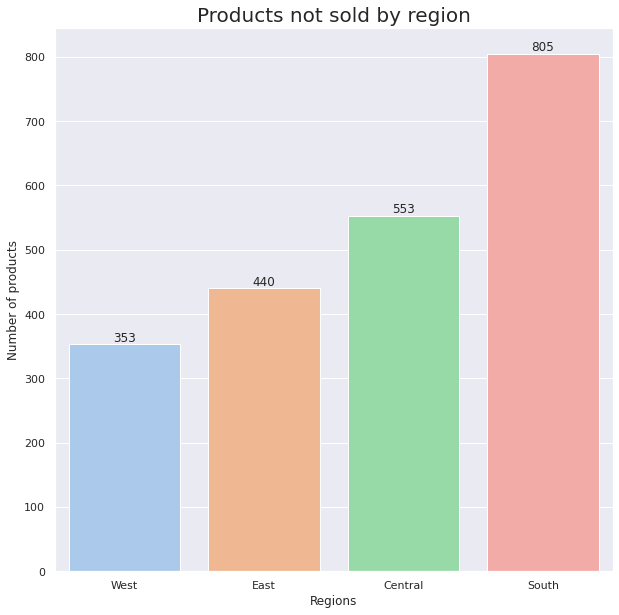

In [941]:

df_prod_not_regions = prod_not_regions.groupby(['region']).count().sort_values('product_id').reset_index()[['region','product_id']]

#palette="gray_r",
plt.figure(figsize=(10,10))
plot_not_west = sns.barplot(x='region', y='product_id',  data=df_prod_not_regions)
plot_not_west.bar_label(plot_not_west.containers[0])
plot_not_west.set_xlabel('Regions')
plot_not_west.set_ylabel('Number of products')
plot_not_west.set_title('Products not sold by region', fontsize=20)

plt.savefig('images/not-sold-plot.png', dpi=1200)

In [913]:
df_prod = prod_not_regions.groupby(['region', 'category']).agg({"product_id":['count']}).reset_index()
df_prod.columns = ['Region', 'Category', 'Product Count']
df_prod = df_prod.sort_values(['Region', 'Product Count'])
df_prod.to_csv(r'data/prod_region_category.csv', index=False)
df_prod

,Region,Category,Product Count
0,Central,Furniture,104
2,Central,Technology,147
1,Central,Office Supplies,302
3,East,Furniture,84
5,East,Technology,113
4,East,Office Supplies,243
6,South,Furniture,165
8,South,Technology,210
7,South,Office Supplies,430
9,West,Furniture,48


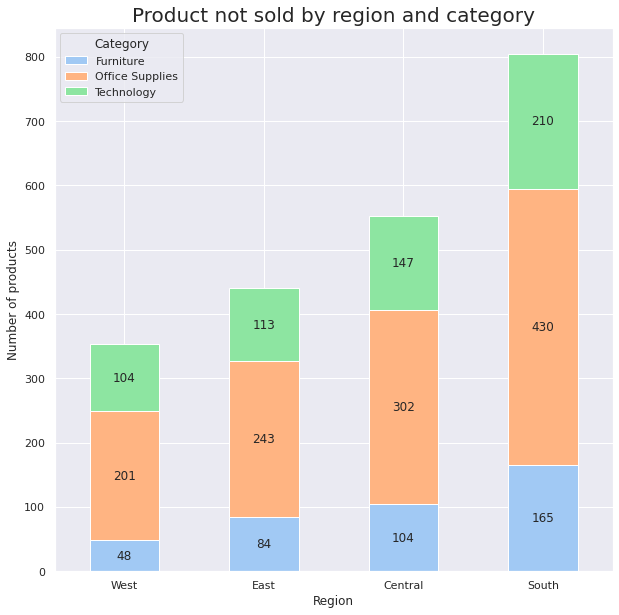

In [940]:
df2=df_prod.pivot(index='Region', columns='Category', values='Product Count').sort_values('Furniture')

pl = df2.plot(kind='bar', stacked=True, figsize=(10,10))

for c in pl.containers:

    # Optional: if the segment is small or 0, customize the labels
    #labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    
    # remove the labels parameter if it's not needed for customized labels
    pl.bar_label(c, label_type='center')


    
pl.tick_params(axis='x', labelrotation=0)
pl.set_ylabel('Number of products')
pl.set_title('Product not sold by region and category', fontsize=20)



plt.savefig('images/not-sold-plot_category.png', dpi=900)

## Popular products

In [915]:
df_popularity = df.groupby(['product_id', 'region']).agg({"quantity":['sum']}).reset_index()
df_popularity.columns = ['product_id', 'region', 'quantity']
df_popularity = df_popularity.sort_values('quantity', ascending=False).reset_index(drop=True)
df_popularity

,product_id,region,quantity
0,TEC-AC-10003832,West,45
1,OFF-BI-10000301,Central,34
2,OFF-BI-10000756,Central,33
3,OFF-PA-10001970,East,33
4,OFF-BI-10003656,East,32
...,...,...,...
5292,TEC-PH-10002624,East,1
5293,FUR-FU-10000965,South,1
5294,TEC-PH-10002597,Central,1
5295,OFF-ST-10003572,Central,1


In [916]:
df_popularity_west = df_popularity[df_popularity.region == 'West'].reset_index(drop=True)
df_popularity_west = prod_list.merge(df_popularity_west, how='inner', on='product_id')
df_popularity_west = df_popularity_west.sort_values('quantity', ascending=False).head(5)
df_popularity_west

,product_id,prod_name,category,sub_category,region,quantity
427,TEC-AC-10003832,Logitech P710e Mobile Speakerphone,Technology,Accessories,West,45
1008,OFF-BI-10000174,Wilson Jones Clip & Carry Folder Binder Tool f...,Office Supplies,Binders,West,32
816,OFF-BI-10001036,Cardinal EasyOpen D-Ring Binders,Office Supplies,Binders,West,31
460,OFF-BI-10001670,Vinyl Sectional Post Binders,Office Supplies,Binders,West,29
1224,OFF-ST-10002486,Eldon Shelf Savers Cubes and Bins,Office Supplies,Storage,West,29


In [917]:
df_popularity_east = df_popularity[df_popularity.region == 'East'].reset_index(drop=True)
df_popularity_east = prod_list.merge(df_popularity_east, how='inner', on='product_id')
df_popularity_east = df_popularity_east.sort_values('quantity', ascending=False).head(5)
df_popularity_east

,product_id,prod_name,category,sub_category,region,quantity
52,OFF-PA-10001970,Xerox 1881,Office Supplies,Paper,East,33
892,OFF-BI-10003656,Fellowes PB200 Plastic Comb Binding Machine,Office Supplies,Binders,East,32
705,FUR-FU-10004848,"Howard Miller 13-3/4"" Diameter Brushed Chrome ...",Furniture,Furnishings,East,31
293,OFF-FA-10000621,"OIC Colored Binder Clips, Assorted Sizes",Office Supplies,Fasteners,East,31
1009,OFF-FA-10002780,Staples,Office Supplies,Fasteners,East,29


In [918]:
df_popularity_central = df_popularity[df_popularity.region == 'Central'].reset_index(drop=True)
df_popularity_central = prod_list.merge(df_popularity_central, how='inner', on='product_id')
df_popularity_central = df_popularity_central.sort_values('quantity', ascending=False).head(5)
df_popularity_central

,product_id,prod_name,category,sub_category,region,quantity
62,OFF-BI-10000301,GBC Instant Report Kit,Office Supplies,Binders,Central,34
476,OFF-BI-10000756,Storex DuraTech Recycled Plastic Frosted Binders,Office Supplies,Binders,Central,33
486,OFF-BI-10001249,Avery Heavy-Duty EZD View Binder with Locking ...,Office Supplies,Binders,Central,29
146,OFF-BI-10000546,Avery Durable Binders,Office Supplies,Binders,Central,29
479,FUR-CH-10002304,"Global Stack Chair without Arms, Black",Furniture,Chairs,Central,27


In [919]:
df_popularity_south = df_popularity[df_popularity.region == 'South'].reset_index(drop=True)
df_popularity_south = prod_list.merge(df_popularity_south, how='inner', on='product_id')
df_popularity_south = df_popularity_south.sort_values('quantity', ascending=False).head(5)
df_popularity_south

,product_id,prod_name,category,sub_category,region,quantity
161,OFF-ST-10003716,Tennsco Double-Tier Lockers,Office Supplies,Storage,South,26
287,FUR-CH-10000513,High-Back Leather Manager's Chair,Furniture,Chairs,South,24
419,OFF-BI-10004728,Wilson Jones Turn Tabs Binder Tool for Ring Bi...,Office Supplies,Binders,South,24
155,OFF-BI-10000014,Heavy-Duty E-Z-D Binders,Office Supplies,Binders,South,23
42,FUR-FU-10001731,Acrylic Self-Standing Desk Frames,Furniture,Furnishings,South,21


In [920]:
df_top_popularity = pd.concat([df_popularity_west, df_popularity_east,
                               df_popularity_central, df_popularity_south])\
                            .reset_index(drop=True)\
                            .sort_values(['region', 'quantity'], ascending=False).reset_index(drop=True)

df_top_popularity.columns = ['Product ID','Product name', 'Category', 'Subcategory', 'Region', 'Quantity']


df_top_popularity.to_csv('data/df_top_popularity.csv', index=False)

df_top_popularity

,Product ID,Product name,Category,Subcategory,Region,Quantity
0,TEC-AC-10003832,Logitech P710e Mobile Speakerphone,Technology,Accessories,West,45
1,OFF-BI-10000174,Wilson Jones Clip & Carry Folder Binder Tool f...,Office Supplies,Binders,West,32
2,OFF-BI-10001036,Cardinal EasyOpen D-Ring Binders,Office Supplies,Binders,West,31
3,OFF-BI-10001670,Vinyl Sectional Post Binders,Office Supplies,Binders,West,29
4,OFF-ST-10002486,Eldon Shelf Savers Cubes and Bins,Office Supplies,Storage,West,29
5,OFF-ST-10003716,Tennsco Double-Tier Lockers,Office Supplies,Storage,South,26
6,FUR-CH-10000513,High-Back Leather Manager's Chair,Furniture,Chairs,South,24
7,OFF-BI-10004728,Wilson Jones Turn Tabs Binder Tool for Ring Bi...,Office Supplies,Binders,South,24
8,OFF-BI-10000014,Heavy-Duty E-Z-D Binders,Office Supplies,Binders,South,23
9,FUR-FU-10001731,Acrylic Self-Standing Desk Frames,Furniture,Furnishings,South,21


## Category popularity

In [926]:
df_category_popularity = df.groupby(['region', 'category'])\
                        .agg({"quantity":['sum']}).reset_index()

df_category_popularity.columns = ['Region', 'Category', 'Product Count']

df_category_popularity = df_category_popularity.sort_values('Product Count', ascending=False)

df_category_popularity

,Region,Category,Product Count
10,West,Office Supplies,7235
4,East,Office Supplies,6462
1,Central,Office Supplies,5409
7,South,Office Supplies,3800
9,West,Furniture,2696
11,West,Technology,2335
3,East,Furniture,2214
5,East,Technology,1942
0,Central,Furniture,1827
2,Central,Technology,1540


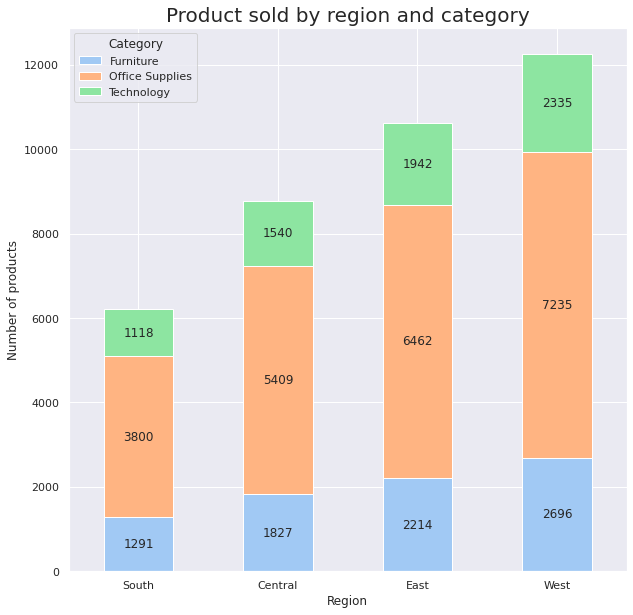

In [937]:
df_category_popularity_pivot=df_category_popularity\
                        .pivot(index='Region', columns='Category', values='Product Count')\
                        .sort_values('Furniture')

pl = df_category_popularity_pivot.plot(kind='bar', stacked=True, figsize=(10,10))
for c in pl.containers:

    # Optional: if the segment is small or 0, customize the labels
    #labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    
    # remove the labels parameter if it's not needed for customized labels
    pl.bar_label(c, label_type='center')


    
pl.tick_params(axis='x', labelrotation=0)
pl.set_ylabel('Number of products')
pl.set_title('Products sold by region and category', fontsize=20)



plt.savefig('images/product_sold_by_region_and_category.png', dpi=900)

## Category popularity

In [ ]:
df_category_popularity = df.groupby(['region', 'category']).agg({"quantity":['sum']}).reset_index()
df_category_popularity.columns = ['region', 'category', 'quantity']
df_category_popularity = df_category_popularity.sort_values('quantity', ascending=False).reset_index(drop=True)

df_category_popularity

In [ ]:
df_category_popularity = df.groupby(['region']).agg({"quantity":['sum']}).reset_index()
df_category_popularity.columns = ['region', 'quantity']
df_category_popularity = df_category_popularity.sort_values('quantity', ascending=False).reset_index(drop=True)

df_category_popularity.tail(40)

In [ ]:
df['revenue'] = df['quantity'] * df['sales']


df_region_month_revenue = df.groupby(['month', 'region']).agg({"revenue":['sum']}).reset_index()
df_region_month_revenue.columns = ['month', 'region', 'revenue']


plt.figure(figsize=(10,8), dpi=300)
sns.lineplot(data=df_region_month_revenue, x="month", y="revenue", hue="region", err_style = None)

In [ ]:
df_category_month_revenue = df.groupby(['month', 'category']).agg({"revenue":['sum']}).reset_index()
df_category_month_revenue.columns = ['month', 'category', 'revenue']


plt.figure(figsize=(10,8), dpi=300)
sns.lineplot(data=df_category_month_revenue, x="month", y="revenue", hue="category", err_style = None)

In [ ]:
df_category_month_revenue = df.groupby(['month', 'category', 'region']).agg({"quantity":['sum']}).reset_index()
df_category_month_revenue.columns = ['Month', 'Category', 'Region', 'Quantity']


#plt.figure(figsize=(16, 16), dpi=1200)
g = sns.FacetGrid(df_category_month_revenue, aspect=4,col="Region", col_wrap=1)
g.map_dataframe(sns.lineplot, x="Month", y="Quantity", hue="Category")
g.add_legend()
g.fig.subplots_adjust(top=0.9)
#g.fig.suptitle('Sells per region')
plt.savefig('images/sells_per_region.png', dpi=1200)

In [ ]:
df_region_month_qnt = df.groupby(['month', 'region']).agg({"quantity":['sum']}).reset_index()
df_region_month_qnt.columns = ['month', 'region', 'quantity']

plt.figure(figsize=(10,8), dpi=300)
sns.lineplot(data=df_region_month_qnt, x="month", y="quantity", hue="region", err_style = None)

In [ ]:
plt.figure(figsize=(10,8), dpi=300)
sns.lineplot(data=df_region_month, x="month", y="revenue", hue="region", err_style = None)


In [ ]:
plt.figure(figsize=(10,8), dpi=300)
sns.lineplot(data=df, x="month", y="quantity", hue="category", err_style = None)

In [ ]:
import dataframe_image as dfi


#df_category_popularity.columns = ['Region', 'Category', 'Product quantity sold']
#df_top_popularity


df_top_popularity = df_top_popularity.style.set_table_styles([
                            {
                                "selector":"thead",
                                "props":"background-color:#D3D3D3; color:black; border:3px #778899;"
                            },

                        ]).set_properties(**{'background-color': '#FFFAFA', 'color': 'black'}).hide(axis="index")



dfi.export(df_top_popularity, 'df_top_popularity.png')



# South
df_popularity_south = df_popularity_south.drop(columns=['product_id'])
df_popularity_south.columns = ['Product', 'Category', 'Subcategory', 'Region', 'Quantity']

df_popularity_south = df_popularity_south.style.set_table_styles([
                            {
                                "selector":"thead",
                                "props":"background-color:#D3D3D3; color:black; border:3px #778899;"
                            },

                        ]).set_properties(**{'background-color': '#FFFAFA', 'color': 'black'}).hide(axis="index")

dfi.export(df_popularity_south, 'df_popularity_south.png')


# West
df_popularity_west = df_popularity_west.drop(columns=['product_id'])
df_popularity_west.columns = ['Product', 'Category', 'Subcategory', 'Region', 'Quantity']

df_popularity_west = df_popularity_west.style.set_table_styles([
                            {
                                "selector":"thead",
                                "props":"background-color:#D3D3D3; color:black; border:3px #778899;"
                            },

                        ]).set_properties(**{'background-color': '#FFFAFA', 'color': 'black'}).hide(axis="index")

dfi.export(df_popularity_west, 'df_popularity_west.png')


# Central
df_popularity_central = df_popularity_central.drop(columns=['product_id'])
df_popularity_central.columns = ['Product', 'Category', 'Subcategory', 'Region', 'Quantity']

df_popularity_central = df_popularity_central.style.set_table_styles([
                            {
                                "selector":"thead",
                                "props":"background-color:#D3D3D3; color:black; border:3px #778899;"
                            },

                        ]).set_properties(**{'background-color': '#FFFAFA', 'color': 'black'}).hide(axis="index")

dfi.export(df_popularity_central, 'df_popularity_central.png')


#East
df_popularity_east = df_popularity_east.drop(columns=['product_id'])
df_popularity_east.columns = ['Product', 'Category', 'Subcategory', 'Region', 'Quantity']

df_popularity_east = df_popularity_east.style.set_table_styles([
                            {
                                "selector":"thead",
                                "props":"background-color:#D3D3D3; color:black; border:3px #778899;"
                            },

                        ]).set_properties(**{'background-color': '#FFFAFA', 'color': 'black'}).hide(axis="index")

dfi.export(df_popularity_east, 'df_popularity_east.png')







In [ ]:
df_top_popularity